### Import das bibliotecas utilizadas

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle
from imblearn.over_sampling import SMOTE
from joblib import dump, load


### Seleciona acelX, acelY, acelZ e atividade

In [11]:
df_andando = pd.read_csv("C:\\classificador-de-padroes-de-mobilidade\\dataset\\raw\\Andando-PausasNãoMarcadas.csv")
df_correndo = pd.read_excel("C:\\classificador-de-padroes-de-mobilidade\\dataset\\raw\\Todas_as_Corridas.xlsx")
df_caindo = pd.read_excel("C:\\classificador-de-padroes-de-mobilidade\\dataset\\raw\\Todas_as_Quedas.xlsx")

colunas_selecionadas = ['acelX', 'acelY', 'acelZ', 'idTipoMovimento']

df_andando   = df_andando[colunas_selecionadas]
df_correndo  = df_correndo[colunas_selecionadas]
df_caindo    = df_caindo[colunas_selecionadas]

# df_andando['idTipoMovimento'] = 'Andando'
# df_correndo['idTipoMovimento'] = 'Correndo'
# df_caindo['idTipoMovimento'] = 'Caindo'

# Selecionando somente as 500 primeiras linhas de cada dataset
# df_andando   = df_andando.head(500)
# df_caindo    = df_caindo.head(500)
# df_correndo  = df_correndo.head(500)

### Mensurar volume do dataset

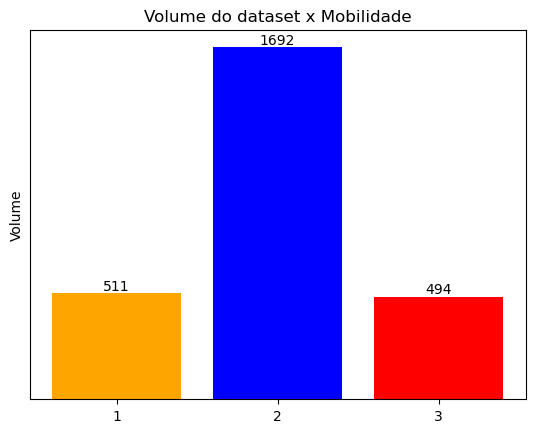

In [12]:
id_andando  = df_andando['idTipoMovimento'][0]
id_correndo = df_correndo['idTipoMovimento'][0]
id_caindo   = df_caindo['idTipoMovimento'][0]

eixo_x = [id_andando, id_correndo, id_caindo]
contagem = [len(df_andando),len(df_correndo),len(df_caindo)]
cores_barras = ['blue','orange','red']
legenda_barras = ['andando','correndo','caindo']

fig, ax = plt.subplots()

bar_container = ax.bar(eixo_x, contagem, label=legenda_barras, color=cores_barras)
ax.bar_label(bar_container, fmt='{:.0f}')
ax.set_title('Volume do dataset x Mobilidade')
# ax.set_xlabel('Mobilidade')
ax.set_ylabel('Volume')
# ax.legend()
plt.yticks([]) # Remover escala do eixo y
plt.xticks(eixo_x)
plt.savefig('C:\\classificador-de-padroes-de-mobilidade\\results\\graphs\\volume_dataset_por_mobilidade.png')
plt.show()

### Adiciona cálculo da magnitude da aceleração

In [13]:
df_andando['MAGNITUDE_ACEL']   = np.sqrt(df_andando['acelX']**2 + df_andando['acelY']**2 + df_andando['acelZ']**2)
df_correndo['MAGNITUDE_ACEL']  = np.sqrt(df_correndo['acelX']**2 + df_correndo['acelY']**2 + df_correndo['acelZ']**2)
df_caindo['MAGNITUDE_ACEL']    = np.sqrt(df_caindo['acelX']**2 + df_caindo['acelY']**2 + df_caindo['acelZ']**2)


### Treinamento e teste do modelo (andando e correndo)

In [14]:
# df_andando_e_correndo = pd.concat([df_andando, df_correndo])

# X_train, X_test, y_train, y_test = train_test_split(df_andando_e_correndo[['acelX', 'acelY', 'acelZ', 'MAGNITUDE_ACEL']], df_andando_e_correndo['idTipoMovimento'], test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)

# y_pred = knn.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.savefig('C:\\classificador-de-padroes-de-mobilidade\\results\\graphs\\knn_matriz_confusao_andando_correndo.png', dpi=300, bbox_inches='tight')

### Treinamento e teste do modelo (andando e caindo)

In [15]:
# df_andando_e_caindo = pd.concat([df_andando, df_caindo])

# X_train, X_test, y_train, y_test = train_test_split(df_andando_e_caindo[['acelX', 'acelY', 'acelZ', 'MAGNITUDE_ACEL']], df_andando_e_caindo['idTipoMovimento'], test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)

# y_pred = knn.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.savefig('C:\\classificador-de-padroes-de-mobilidade\\results\\graphs\\knn_matriz_confusao_andando_caindo.png', dpi=300, bbox_inches='tight')

### Treinamento e teste do modelo (correndo e caindo)

In [16]:
# df_correndo_e_caindo = pd.concat([df_correndo, df_caindo])

# X_train, X_test, y_train, y_test = train_test_split(df_correndo_e_caindo[['acelX', 'acelY', 'acelZ', 'MAGNITUDE_ACEL']], df_correndo_e_caindo['idTipoMovimento'], test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# knn = KNeighborsClassifier(n_neighbors=7)
# knn.fit(X_train, y_train)

# y_pred = knn.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.savefig('C:\\classificador-de-padroes-de-mobilidade\\results\\graphs\\knn_matriz_confusao_correndo_caindo.png', dpi=300, bbox_inches='tight')

### Treinamento e teste do modelo (todas as mobilidades)

[[ 73   3  23]
 [  0 345   2]
 [ 19   5  70]]
              precision    recall  f1-score   support

           1       0.79      0.74      0.76        99
           2       0.98      0.99      0.99       347
           3       0.74      0.74      0.74        94

    accuracy                           0.90       540
   macro avg       0.84      0.83      0.83       540
weighted avg       0.90      0.90      0.90       540



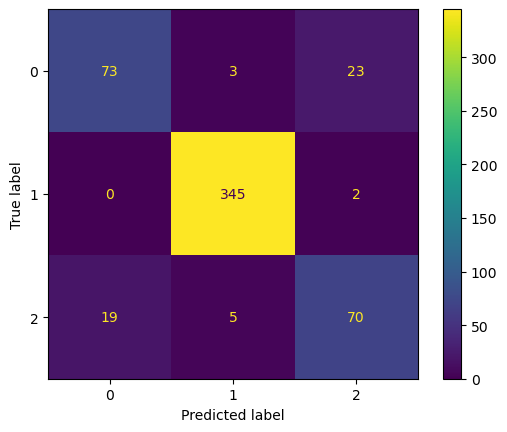

In [17]:
df_todos_os_movimentos = pd.concat([df_andando, df_correndo, df_caindo])

X_train, X_test, y_train, y_test = train_test_split(df_todos_os_movimentos[['acelX', 'acelY', 'acelZ','MAGNITUDE_ACEL']], df_todos_os_movimentos['idTipoMovimento'], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig('C:\\classificador-de-padroes-de-mobilidade\\results\\graphs\\knn_matriz_confusao_todos_os_movimentos.png', dpi=300, bbox_inches='tight')

with open('modelos/knn_model.joblib', 'wb') as file:
    dump(knn, file)


In [18]:
df_teste_modelo = df_todos_os_movimentos
df_teste_modelo = df_teste_modelo.drop(columns=['idTipoMovimento'])
    
with open('modelos/knn_model.joblib', 'rb') as file:
    knn_loaded = load(file)
    
X_test = df_teste_modelo

y_pred = knn_loaded.predict(X_test)

print("Previsões: ", y_pred)

with open('predicoes/knn_predicoes.txt', 'w') as f:
    for pred in y_pred:
        f.write(f"{pred}\n")

print("Previsões salvas no arquivo 'predicoes/knn_predicoes.txt'")

c:\Users\julia\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Previsões:  [1 1 1 ... 3 1 1]
Previsões salvas no arquivo 'predicoes/knn_predicoes.txt'
